<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data & Kaggle Challenge

Note: This is part 1 of the code notebook covering the following:-
1. [Problem Statement](#1.-Problem-Statement)
2. [Background](#2.-Background)
3. [Dataset](#3.-Dataset)
4. [Library Imports & Functions Creation](#4.-Library-Imports-&-Functions-Creation)
5. [Examining & Streamlining of Variables](#5.-Examining-&-Streamlining-of-Variables)
6. [Feature Engineering](#6.-Feature-Engineering)

## 1. Problem Statement

This project is meant to predict the sales price of houses in [Ames](https://en.wikipedia.org/wiki/Ames,_Iowa), a city based in the state of Iowa of United States from 2005 to 2010. Its main objective is to identify the best predictors of house prices in Ames over the period of prolonged recession.

In summary, the project shall :-
1. perform data cleaning without compromising data integrity;
2. engineer new data from existing data;
3. conduct statistical tests to eliminate unhelpful data; and
4. identify the best predictors of house prices through extensive linear regression modeling.

## 2. Background

From 2005 to 2010, the United States was experiencing an economy downturn. Based on the [data](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?end=2021&locations=US&start=2000) from the world bank, the GDP of the United States has been on a downward trend from 2004 to 2009 before making a recovery in 2010. Part of the downward trend was labelled [The Great Recession](https://www.cnbc.com/2020/04/09/what-happened-in-every-us-recession-since-the-great-depression.html), which lasted for about 1.5 years. Despite the recent recession of the United States economy due to the Covid-19 pandemic that lasted for merely two months in 2020, the United States has been [predicted](https://fortune.com/2022/09/21/long-ugly-recession-dr-doom-nouriel-roubini/) to suffer another 'long and ugly' recession like The Great Recession. Hence, to predict the impact of the next recession, the project is inclined to examine the period from 2005 to 2010 as the most recent prolonged recession.

Against this backdrop, the project narrows its scope to the housing market of the city of Ames. Interestingly, Ames was one of those cities which withstood the [general downward trend](https://fred.stlouisfed.org/series/MSPUS) of housing prices over the recession. Despite the drop in median sales price of houses sold in the United States, the house prices in Ames remained [constant](https://fred.stlouisfed.org/series/ATNHPIUS11180Q). The resillence of house prices in Ames was likely due to [sharp increase in population](https://worldpopulationreview.com/us-cities/ames-ia-population) since 2000.

## 3. Dataset

The original data dictionary of the dataset can found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

Alternatively, I have also created a [document](https://www.dropbox.com/s/baklfylvkgngcpt/Proj%202%20Dataset%20Unique%20Values.pdf?dl=0) listing all the unique values of the dataset for a better overview.

The data itself is taken from [Kaggle](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge). It comprises of two parts: training dataset & test dataset (used for Kaggle score).

## 4. Library Imports & Functions Creation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from scipy import stats
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from warnings import simplefilter

In [2]:
def positive_heatmap(df):
    simplefilter(action='ignore', category=DeprecationWarning)
    plt.subplots(figsize=(17, 17))
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    mask = mask[1:, :-1]
    corr1 = df.corr().iloc[1:,:-1].copy()
    corr1 = corr1[abs(corr1) >= 0.7]
    corr2 = sns.heatmap(corr1,mask=mask, cmap='coolwarm_r', annot=True, fmt=".2f", annot_kws={'fontsize':11},linewidths=1, cbar = False,linecolor='black')
    corr2.set_yticklabels(corr2.get_ymajorticklabels(), fontsize = 14)
    corr2.set_xticklabels(corr2.get_xmajorticklabels(), fontsize = 14);

In [3]:
def cat_less_than_10_uniques():
    count=1
    plt.subplots(figsize=(30, 40))
    for col in cat_house_train:
        plt.subplot(10,2,count)
        if cat_house_train[col].nunique() < 10:
            ax = sns.countplot(y=col, data=cat_house_train)
            ax.bar_label(ax.containers[0])
            count+=1
plt.show()

In [4]:
def cat_at_least_10_uniques():
    count=1
    plt.subplots(figsize=(30, 30))
    for col in cat_house_train:
        plt.subplot(4, 2, count)
        if cat_house_train[col].nunique() >= 10:
            ax = sns.countplot(y=col, data=cat_house_train)
            ax.bar_label(ax.containers[0])
            count += 1
        if count > 4: break
plt.show()

## 5. Data Cleaning & Exploratory Data Analysis

In [5]:
house_train = pd.read_csv('./datasets/train.csv')

We shall proceed to:

1. examine the training dataset;
2. rectify if there is any duplicated row; 
3. rectify if there is any null value;
4. examine and strealine the dataset;
5. divide the [variables](https://statistics.laerd.com/statistical-guides/types-of-variable.php) into continuous, discrete, ordinal & nominal; 
6. edit the features in each category accordingly in preparation for further analysis; and
7. rectify if there is any outlier.

Note: Changes made to the test dataset is found under the side notebook. It will mirror the changes made to the training dataset under this section and the following section.

### 5.1 Examining Dataset

In [6]:
# We want to get a quick feel for the data
pd.set_option('display.max_columns', None)
house_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
# There are 81 columns and 2051 rows
# There are missing data
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

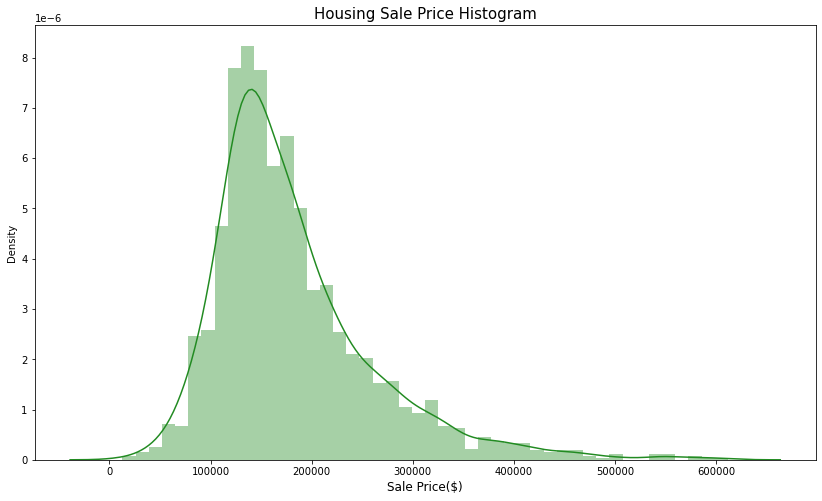

In [8]:
# We want to pay special attention to house prices as it is the Y variable we are predicting
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(house_train.SalePrice, kde=True, ax=ax, color='forestgreen')
plt.title('Housing Sale Price Histogram', fontsize=15)
plt.xlabel('Sale Price($)', fontsize=12);

In [9]:
# Some rudimentary information on Y
print(f'Mean Price: {house_train.SalePrice.describe()[1]:.2f}.')
print(f'Min Price: {house_train.SalePrice.describe()[3]:.2f}')
print(f'Max Price: {house_train.SalePrice.describe()[7]:.2f}')

Mean Price: 181469.70.
Min Price: 12789.00
Max Price: 611657.00


### Observation

As SalePrice is a continous variable, the approach is to use linear regression for prediction. The distribution of Y is slightly skewed to the right. Based on the above diagram, it is clear that there are outliers.

### 5.2 Checking for Duplicated Rows

In [10]:
# There are no duplicated rows in the data. 
house_train.duplicated().value_counts()

False    2051
dtype: int64

### 5.3 Checking for Null Values

In [11]:
# Creating a table format
pd.DataFrame(house_train.isna().sum())
pd.DataFrame(house_train.isna().sum()).reset_index()
missing_df = pd.DataFrame(house_train.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls'] 
missing_df['%nulls'] = missing_df['num_nulls']*100/len(house_train)
missing_df = missing_df[missing_df['num_nulls']>0].sort_values(by=["%nulls"], ascending=False)
print(f'There are {len(missing_df)} columns with missing values.')
print('')
missing_df

There are 26 columns with missing values.



,col,num_nulls,%nulls
73,Pool QC,2042,99.561190
75,Misc Feature,1986,96.830814
7,Alley,1911,93.174061
74,Fence,1651,80.497318
58,Fireplace Qu,1000,48.756704
4,Lot Frontage,330,16.089712
60,Garage Yr Blt,114,5.558264
65,Garage Cond,114,5.558264
64,Garage Qual,114,5.558264
61,Garage Finish,114,5.558264


### Observation

1. There are 26 columns with missing values.
2. Based on the dataset, there is an existing pattern of using '0' to indicate that a feature does not exist. For instance, see any of these columns: 'BsmtFin SF 2', 'Bsmt Unf SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area' & 'Misc Val'.
3. There is a need for the dataset to be consistent on the usage of '0'. For instance, 'Pool Area' with the value 0 means there is no pool for the house. However, those garage features for those houses with a garage are left with missing values instead. Hence, I am inclined to standardise the usage of '0' to indicate that a feature does not exist.
4. To strengthen point 3, the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) explicitly mentions that NA values stand for no feature. For verification, see under the description for these columns: 'Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFinType 2', 'FireplaceQu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence' & 'Misc Feature'.
5. In summary, given the above analysis on missing values, I shall impute '0' to all.

In [12]:
# Imputing value 0 to all missing values
house_train.loc[:, "Pool QC"] = house_train.loc[:, "Pool QC"].fillna(0)
house_train.loc[:, "Misc Feature"] = house_train.loc[:, "Misc Feature"].fillna(0)
house_train.loc[:, "Alley"] = house_train.loc[:, "Alley"].fillna(0)
house_train.loc[:, "Fence"] = house_train.loc[:, "Fence"].fillna(0)
house_train.loc[:, "Fireplace Qu"] = house_train.loc[:, "Fireplace Qu"].fillna(0)
house_train.loc[:, "Lot Frontage"] = house_train.loc[:, "Lot Frontage"].fillna(0)
house_train.loc[:, "Garage Yr Blt"] = house_train.loc[:, "Garage Yr Blt"].fillna(0)
house_train.loc[:, "Garage Cond"] = house_train.loc[:, "Garage Cond"].fillna(0)
house_train.loc[:, "Garage Qual"] = house_train.loc[:, "Garage Qual"].fillna(0)
house_train.loc[:, "Garage Finish"] = house_train.loc[:, "Garage Finish"].fillna(0)
house_train.loc[:, "Garage Type"] = house_train.loc[:, "Garage Type"].fillna(0)
house_train.loc[:, "Bsmt Exposure"] = house_train.loc[:, "Bsmt Exposure"].fillna(0)
house_train.loc[:, "BsmtFin Type 1"] = house_train.loc[:, "BsmtFin Type 1"].fillna(0)
house_train.loc[:, "BsmtFin Type 2"] = house_train.loc[:, "BsmtFin Type 2"].fillna(0)
house_train.loc[:, "Bsmt Qual"] = house_train.loc[:, "Bsmt Qual"].fillna(0)
house_train.loc[:, "Bsmt Cond"] = house_train.loc[:, "Bsmt Cond"].fillna(0)
house_train.loc[:, "Mas Vnr Type"] = house_train.loc[:, "Mas Vnr Type"].fillna(0)
house_train.loc[:, "Mas Vnr Area"] = house_train.loc[:, "Mas Vnr Area"].fillna(0)
house_train.loc[:, "Bsmt Half Bath"] = house_train.loc[:, "Bsmt Half Bath"].fillna(0)
house_train.loc[:, "Bsmt Full Bath"] = house_train.loc[:, "Bsmt Full Bath"].fillna(0)
house_train.loc[:, "Total Bsmt SF"] = house_train.loc[:, "Total Bsmt SF"].fillna(0)
house_train.loc[:, "Bsmt Unf SF"] = house_train.loc[:, "Bsmt Unf SF"].fillna(0)
house_train.loc[:, "BsmtFin SF 1"] = house_train.loc[:, "BsmtFin SF 1"].fillna(0)
house_train.loc[:, "BsmtFin SF 2"] = house_train.loc[:, "BsmtFin SF 2"].fillna(0)
house_train.loc[:, "Garage Cars"] = house_train.loc[:, "Garage Cars"].fillna(0)
house_train.loc[:, "Garage Area"] = house_train.loc[:, "Garage Area"].fillna(0)
house_train.loc[:, "Electrical"] = house_train.loc[:, "Electrical"].fillna(0)

### 5.4 Examining & Streamlining of Variables

In [13]:
print(f'Number of Columns Before: {house_train.shape[1]}')

Number of Columns Before: 81


Given the high number of columns, we shall:

1. drop redundant data; and
2. create new data by streamlining old data.

#### Drop: Observation Number & Parcel Identification Number

In [14]:
print(f'Number of Unique Values from "ID" column: {house_train["Id"].nunique()}')

Number of Unique Values from "ID" column: 2051


In [15]:
print(f'Number of Unique Values from "PID" column: {house_train["PID"].nunique()}')

Number of Unique Values from "PID" column: 2051


In [16]:
# As the no. of unique values is the same as the no. of rows in the dataset, the values from both columns are not helpful predictors
# Hence, we shall drop them
house_train.drop(columns=['Id', 'PID'], inplace=True)

#### Create: Age of House at the Point of Sales

In [17]:
# We shall create the age of the house at the point of sales
# If the year of remodelling is more recent, we will calculate the age of house from that year instead
house_train['Age'] = house_train.apply(lambda x: x['Yr Sold']-x['Year Built'] if (x['Year Built']<x['Year Remod/Add']) 
                                                           else (x['Yr Sold']-x['Year Remod/Add']), axis=1)

In [18]:
# Dropping 'Year Built' and 'Year Remod/Add' columns
house_train.drop(columns=['Year Built', 'Year Remod/Add'], inplace=True)

#### Create: Area of Basement

In [19]:
# We shall create the total finished Bsmt area of the house
house_train['BsmtFin Area'] = house_train['BsmtFin SF 1'] + house_train['BsmtFin SF 2']

In [20]:
# Dropping those columns we used for the above calculation
house_train.drop(columns=['BsmtFin SF 1', 'BsmtFin SF 2'], inplace=True)

#### Create: Square Feet of Floors

In [21]:
# We shall create the total square of all floors 
# Based on the 'Bldg Type' column, there are only houses with 2 floors at most
house_train['Floors SF'] = house_train['1st Flr SF'] + house_train['2nd Flr SF']

In [22]:
# Dropping those columns we used for the above calculation
house_train.drop(columns=['1st Flr SF', '2nd Flr SF'], inplace=True)

#### Create: Size of Porch

In [23]:
# We shall create the total size of porch from alll kinds of porches
house_train['Size of Porch'] = house_train['Open Porch SF'] + house_train['Enclosed Porch'] + house_train['3Ssn Porch'] + house_train['Screen Porch']

In [24]:
# Dropping those columns we used for the above calculation
house_train.drop(columns=['Open Porch SF', 'Enclosed Porch', 'Screen Porch', '3Ssn Porch'], inplace=True)

#### Create: Number of Bathroom in Bsmt

In [25]:
# We shall create the total number of bathrooms in basement regardless of full bath or half bath
house_train['Bsmt Bath'] = house_train['Bsmt Full Bath'] + house_train['Bsmt Half Bath']

In [26]:
# Dropping those columns we used for the above calculation
house_train.drop(columns=['Bsmt Full Bath', 'Bsmt Half Bath'], inplace=True)

#### Create: Number of Bathroom

In [27]:
# We shall create the total number of bathrooms regardless of full bath or half bath
house_train['Bath'] = house_train['Full Bath'] + house_train['Half Bath']

In [28]:
# Dropping those columns we used for the above calculation
house_train.drop(columns=['Full Bath', 'Half Bath'], inplace=True)

#### Special Mention: Year Sold

While the 'Year Sold' feature is a discrete variable (i.e. numerical values of the different years), I am inclined to treat it as a categorical variable instead due to the impact of recession during the period. Instead of putting the years on a scale (from 2005 to 2010), each year should be treated categorically to provide a better analysis.

In [29]:
# Columns left after 4.4
print(f'Number of Columns After 5.4: {house_train.shape[1]}')

Number of Columns After 5.4: 71


### 5.5 Dividing between Continuous, Discrete, Ordinal & Nominal Variables

I shall now categorize the columns of the dataset into their respective types. Refer to the table below.

| Index | Continuous | Discrete | Ordinal | Nominal
|:---:|:---:|:---:|:---:|:---:|
| 1 | Lot Frontage | *Age |  Street  | MS SubClass |
| 2 | Lot Area | *Bsmt Bath | Alley  | MS Zoning |
| 3 | Mas Vnr Area | *Bath | Lot Shape | Land Contour |
| 4 | Total Bsmt SF | Bedroom AbvGr | Utilities | Lot Config |
| 5 | Bsmt Unf SF | Kitchen AbvGr | Land Slope | Neighborhood |
| 6 | *BsmtFin Area | TotRms AbvGrd | Overall Qual | Condition 1 |
| 7 | *Floors SF | Fireplaces | Overall Cond | Condition 2 |
| 8 | Low Qual Fin SF | Garage Yr Blt | Exter Qual | Bldg Type |
| 9 | Gr Liv Area | Garage Cars | Exter Cond | House Style |
| 10 | Garage Area | Mo Sold | Bsmt Qual | Roof Style |
| 11 | Wood Deck SF | --- | Bsmt Cond | Roof Matl |
| 12 | *Size of Porch | --- | Bsmt Exposure | Exterior 1st |
| 13 | Pool Area | --- | BsmtFin Type 1 | Exterior 2nd |
| 14 | Misc Val | --- | BsmtFin Type 2 | Mas Vnr Type |
| 15 | ^SalePrice | --- | Electrical | Foundation |
| 16 | --- | --- | Heating QC | Heating |
| 17 | --- | --- | Kitchen Qual | Central Air |
| 18 | --- | --- | Functional | Garage Type |
| 19 | --- | --- | Fireplace Qu | Misc Feature |
| 20 | --- | --- | Garage Finish | Sale Type |
| 21 | --- | --- | Garage Qual | Yr Sold  |
| 22 | --- | --- | Garage Cond | --- |
| 23 | --- | --- | Paved Drive | --- |
| 24 | --- | --- | Pool QC | --- |
| 25 | --- | --- | Fence | --- |

Note: *Created variables, ^Dependent Variable (Y)

### Observation

1. There are 15 continuous, 10 discrete, 25 ordinal and 21 nominal variables. 
    - There is 50 numeric variables as continous, discrete and ordinal variables are numbers.
    - The values of each column needs to be checked and adjusted accordingly.
    - Continuous, discrete and ordinal variables should be in numeric format while nominal variables should be in object format. 
2. There are slight differences to the classification made in the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). For instance, the data dictionary treats 'street' and 'alley' as nominal data. However, I am more inclined to treat them as ordinal data as a gravel surface is [less expensive and duration](https://www.wolfpaving.com/blog/3-driveway-pros-cons-gravel-vs.-asphalt-paving) than paved.

### 5.6 Treatment of Variables

#### Continuous & Discrete Variables

Changes are not required for these variables.

#### Ordinal Variables

There are several ordinal variable with similar scaling. For instance, "Po, Fa, TA, Gd, Ex". In those instances, I will keep the scaling consistent across such variables.

In [30]:
house_train = house_train.replace({"Street" : {"Grvl" : 1, "Pave" : 2},
                                   "Alley" : {"Grvl" : 1, "Pave" : 2},
                                   "Lot Shape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                                   "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                                   "Land Slope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                                   "Exter Qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                   "Exter Cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                   "Bsmt Qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                                   "Bsmt Cond" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                   "Bsmt Exposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                                   "BsmtFin Type 1" : {"Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                                   "BsmtFin Type 2" : {"Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                                   "Electrical" : {"Mix" : 1, "FuseP" : 2, "FuseF" : 3, "FuseA" : 4, "SBrkr" : 5},
                                   "Heating QC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                   "Kitchen Qual" : {"Po" : 1,"Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                   "Fireplace Qu" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                   "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                                   "Garage Finish" : {"Unf" : 1, "RFn": 2, "Fin" : 3},
                                   "Garage Qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                   "Garage Cond" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                   "Paved Drive" : {"N" : 0, "P" : 1, "Y" : 2},
                                   "Pool QC" : {"Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                                   "Fence" : {"MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4}}
                                 )

#### Nominal Variables

The key is to ensure that there is no numeric values in these variables in order to do one hot encoding later in the analysis. 

In [31]:
house_train = house_train.replace({"MS SubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                                   "Mas Vnr Type" : {0 : "None"}, 
                                   "Garage Type" : {0 : "None"}, 
                                   "Misc Feature" : {0 : "None"},
                                   "Yr Sold": {2006: "2006", 2007: "2007", 2008: "2008",
                                               2009: "2009", 2010: "2010"}})

In [32]:
# Providing a summary
print(f'Total number of numeric variables: {house_train.dtypes.value_counts()[0] + house_train.dtypes.value_counts()[2]}')
print(f'Total number of nominal variables: {house_train.dtypes.value_counts()[1]}')
print('The numbers tally with the table under 4.5.')

Total number of numeric variables: 50
Total number of nominal variables: 21
The numbers tally with the table under 4.5.


### 5.7 Checking for Outliers

We want to pay attention to min and max values to identify outliers for the numeric variables.

In [33]:
# Checking the distribution of all numeric values
pd.set_option('display.max_rows', None)
outliers_check_df = house_train.describe().transpose()
outliers_check_df = outliers_check_df.drop(columns=['count', '25%', '50%', '75%'])
outliers_check_df

,mean,std,min,max
Lot Frontage,57.944417,33.137332,0.0,313.0
Lot Area,10065.208191,6742.488909,1300.0,159000.0
Street,1.996587,0.058335,1.0,2.0
Alley,0.095076,0.373814,0.0,2.0
Lot Shape,3.595807,0.566514,1.0,4.0
Utilities,3.998537,0.049365,2.0,4.0
Land Slope,2.947343,0.244264,1.0,3.0
Overall Qual,6.112140,1.426271,1.0,10.0
Overall Cond,5.562165,1.104497,1.0,9.0
Mas Vnr Area,98.626524,174.324690,0.0,1600.0


A general rule of thumb is that outliers are at least 3 standard deviation above/below the mean.

In [34]:
# I will loop through the dataframe to identify if there is any outliers for each variable.
outliers_check = []
for i, r in outliers_check_df.iterrows():
    if r['max'] > (3*r['std'] + r['mean']): outliers_check.append('Y')
    elif r['min'] < (r['mean'] - 3*r['std']): outliers_check.append('Y')
    else: outliers_check.append('N')
outliers_check_df['outliers_check'] = outliers_check
# I will filter out those with outliers and the ordinal variables
outliers_check_df = outliers_check_df[(outliers_check_df['outliers_check'] == 'Y') & (outliers_check_df['max'] > 15)]
outliers_check_df

,mean,std,min,max,outliers_check
Lot Frontage,57.944417,33.137332,0.0,313.0,Y
Lot Area,10065.208191,6742.488909,1300.0,159000.0,Y
Mas Vnr Area,98.626524,174.324690,0.0,1600.0,Y
Bsmt Unf SF,567.451487,445.022846,0.0,2336.0,Y
Total Bsmt SF,1057.471965,449.908003,0.0,6110.0,Y
Low Qual Fin SF,5.512921,51.068870,0.0,1064.0,Y
Gr Liv Area,1499.330083,500.447829,334.0,5642.0,Y
Garage Yr Blt,1868.725987,454.133654,0.0,2207.0,Y
Garage Area,473.440761,216.135102,0.0,1418.0,Y
Wood Deck SF,93.833740,128.549416,0.0,1424.0,Y


### Observation

1. The above 17 columns are variables with outliers. 
2. While outliers are known to skew findings, the inclination is to retain the information as it is highly possible for houses with exceptional areas, sales price etc.
3. 'Garage Yr Blt' column has year 2207 as its max value. This is not possible as [dataset](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) was only complied in 2010. Further investigation is required to correct the value.
4. 'Age' column has -1 as its min value. This is not possible. Further investigation is required to correct the value.

In [35]:
pd.set_option('display.max_columns', None)
house_train[(house_train['Garage Yr Blt'] > 2010)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Age,BsmtFin Area,Floors SF,Size of Porch,Bsmt Bath,Bath
1699,SC20,RL,68.0,8298,2,0,3,HLS,4,Inside,3,Timber,Norm,Norm,1Fam,1Story,8,5,Hip,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,2,6,1,963.0,1546.0,GasA,5,Y,5,0,1564,2,1,5,6,8,1,4,Attchd,2207.0,2,2.0,502.0,3,3,2,132,0,0,0,None,0,9,2007,New,267300,1,583.0,1564,0,0.0,2


#### Amend: Garage Year Built
- There is only one house with garage year built beyond 2010. 
- The house was built on 2006 and was remodified in 2007.
- The house was sold in 2007.
- Hence, the garage can only built from 2006 to 2007.
- Given that the wrong data is '2207', I am more inclined to adjust the value to 2007.

In [36]:
house_train = house_train.replace({"Garage Yr Blt" : {2207 : 2007}})

In [37]:
house_train[(house_train['Age'] < 0)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Age,BsmtFin Area,Floors SF,Size of Porch,Bsmt Bath,Bath
1885,SC20,RL,128.0,39290,2,0,3,Bnk,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,10,5,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,5,3,PConc,5,3,3,6,1,1085.0,5095.0,GasA,5,Y,5,0,5095,2,1,5,15,8,2,4,Attchd,2008.0,3,3.0,1154.0,3,3,2,546,0,0,0,Elev,17000,10,2007,New,183850,-1,4010.0,5095,484,2.0,3


#### Amend: Age

- There is only one house with age below 0.
- This is only possible if the year sold is less than the year built or modified.
- There is a wrong data entry on year sold.
- I shall adjust the value to 0.

In [38]:
house_train = house_train.replace({"Age" : {-1 : 0}})

## 6. Feature Engineering

We shall proceed to:

1. check the statistical significance for numerical features with sales price and drop them accordingly;
2. check for multi-collinearity between numerical features and drop them accordingly;
3. check for multi-collinearity between nominal features and drop them accordingly; and
4. combine both subsets of data to prepare for modelling.

### 6.1 Statistical Significance for Numerical Features

In [39]:
# Separating the numeric features from the rest
num_house_train = house_train.select_dtypes(include=['int64','float64'])
num_house_train_without_y = num_house_train.drop(columns=['SalePrice'])

In [40]:
print(f'Number of Numerical Features Before: {num_house_train_without_y.shape[1]}')

Number of Numerical Features Before: 49


In [41]:
# Creating a table to see correlation between features and Y while testing p-value at the same time
coef = []
p_value = []
for i, j in num_house_train_without_y.iteritems():
    x, y = stats.pearsonr(j, house_train['SalePrice'])
    coef.append(x)
    p_value.append(y)

In [42]:
num_house_train_t = num_house_train_without_y.transpose()
num_house_train_t.reset_index(inplace=True)

In [43]:
num_house_train_stats_test = num_house_train_t.drop(num_house_train_t.columns[1:],axis = 1)
num_house_train_stats_test['corr_coef'] = coef
num_house_train_stats_test['p_value'] = p_value
stats_sign = []
for i in num_house_train_stats_test['p_value']:
    if i < 0.05: stats_sign.append('Y')
    else: stats_sign.append('N')
num_house_train_stats_test['p_value<0.05'] = stats_sign

In [44]:
num_house_train_stats_test.sort_values(by='corr_coef', ascending = False)

,index,corr_coef,p_value,p_value<0.05
7,Overall Qual,0.800207,0.000000e+00,Y
10,Exter Qual,0.712146,3.786441e-317,Y
45,Floors SF,0.705270,1.971452e-308,Y
22,Gr Liv Area,0.697038,2.530924e-298,Y
25,Kitchen Qual,0.692336,1.057370e-292,Y
33,Garage Area,0.649897,1.763147e-246,Y
32,Garage Cars,0.647781,2.276527e-244,Y
18,Total Bsmt SF,0.629303,1.267027e-226,Y
12,Bsmt Qual,0.612188,3.153529e-211,Y
31,Garage Finish,0.557839,4.324347e-168,Y


### Observation

1. The above test is to ensure that there is sufficient evidence to conclude that there is a significant linear relationship between the features and the target variable. For more info, see this [helpful article](https://courses.lumenlearning.com/introstats1/chapter/testing-the-significance-of-the-correlation-coefficient/).
2. The 'Overall Qual', 'Exter Qual' and 'Floors SF' features have strong positive correlation of over 0.7 with 'SalesPrice'.
3. The test of signicant is p_value less than 0.05. 
4. I will proceed to drop those 8 columns which are stastistically insignificant.

In [45]:
num_house_train_without_y = num_house_train_without_y.drop(columns=['Utilities', 
                                                                    'Exter Cond',
                                                                    'BsmtFin Type 2',
                                                                    'Low Qual Fin SF',
                                                                    'Pool Area',
                                                                    'Pool QC',
                                                                    'Misc Val',
                                                                    'Mo Sold'])

In [46]:
print(f'Number of Numerical Columns after 6.1: {num_house_train_without_y.shape[1]}')

Number of Numerical Columns after 6.1: 41


### 6.2 Multi-Colinearity Check for Numerical Variables

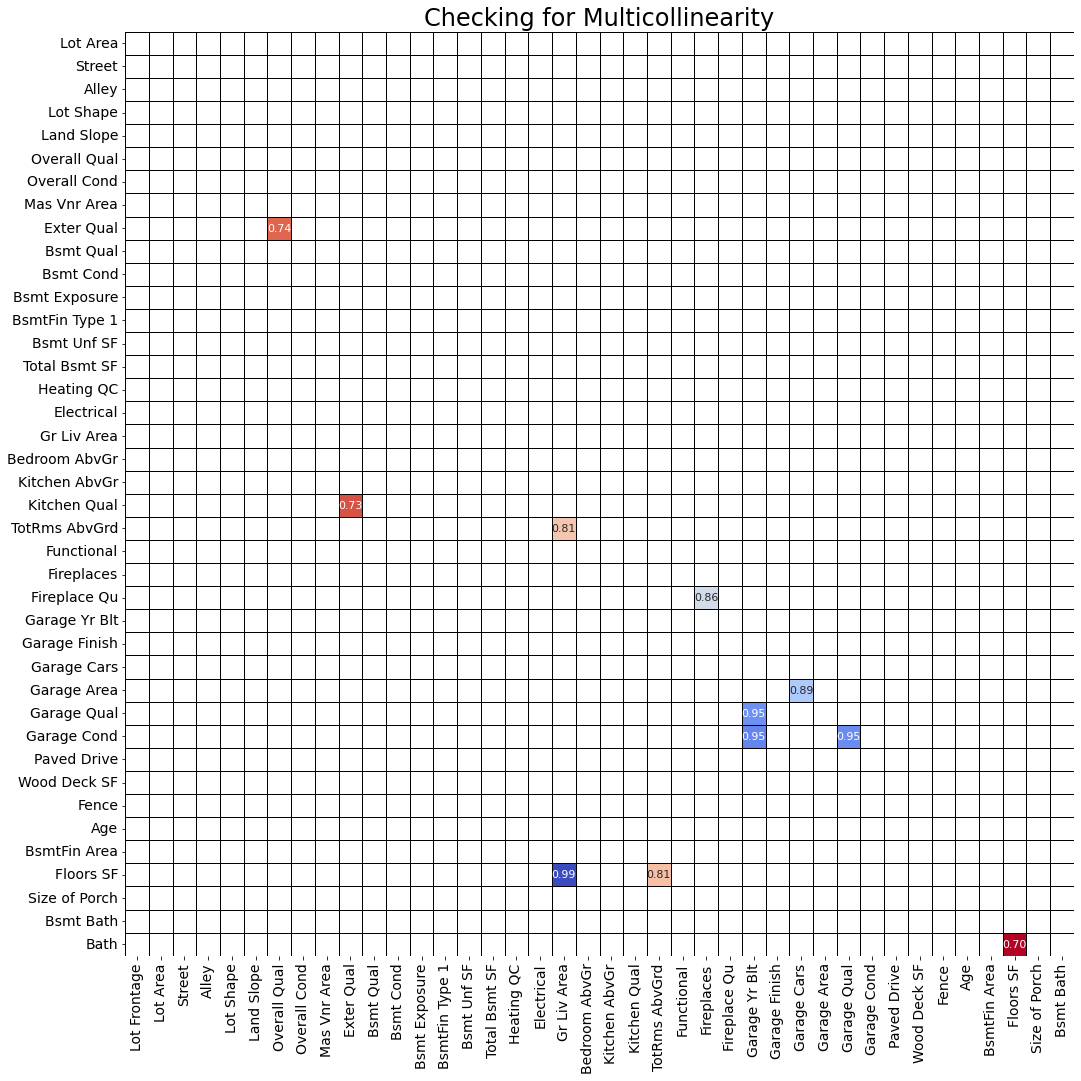

In [47]:
# Providing a heatmap for correlation between all features
positive_heatmap(num_house_train_without_y)
plt.title("Checking for Multicollinearity", size='24');

In [48]:
# There is no negative correlation of less than -0.7
# Running the code below to proof that the output is empty
num_house_train_without_y.corr()[num_house_train_without_y.corr() <= -0.7].value_counts()

Series([], dtype: int64)

### Observation

1. The above heatmap is meant to visualise all the numeric features with positive correlation of more than 0.7.
2. There are no numeric features with negative correlation of less than 0.7.
3. The threhold of above 0.7 and below -0.7 is deliberately chosen to pick out the features only with the strongest correlation. The inclination is to preserve as many features before modeling especially since regression models like lasso and ridge are able to minimise the impact of unhelpful features.
4. The decision process to drop features is keep those features with highest colleration to the target variable when deciding between the features with strong correlation.

In [49]:
# Listing all the features with strong correlation with each other in a table format
num_house_train_without_y_corr = num_house_train_without_y.corr()
arr = num_house_train_without_y_corr.values
index_names = num_house_train_without_y_corr.index
col_names = num_house_train_without_y_corr.columns
R,C = np.where(np.triu(arr,1)>=0.7)
out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=[['row','col','corr']])
df_out

,row,col,corr
0,Overall Qual,Exter Qual,0.740257
1,Exter Qual,Kitchen Qual,0.730562
2,Gr Liv Area,TotRms AbvGrd,0.813333
3,Gr Liv Area,Floors SF,0.99478
4,TotRms AbvGrd,Floors SF,0.805444
5,Fireplaces,Fireplace Qu,0.859734
6,Garage Yr Blt,Garage Qual,0.947667
7,Garage Yr Blt,Garage Cond,0.954936
8,Garage Cars,Garage Area,0.893442
9,Garage Qual,Garage Cond,0.950493


In [50]:
# Dropping columns with multi-collinearity
num_house_train_without_y = num_house_train_without_y.drop(columns=['Exter Qual',
                                                                    'Gr Liv Area',
                                                                    'TotRms AbvGrd',
                                                                    'Fireplaces',
                                                                    'Garage Yr Blt',
                                                                    'Garage Cond',
                                                                    'Bath',
                                                                    'Garage Cars'])

In [51]:
print(f'Number of Numerical Columns after 6.2: {num_house_train_without_y.shape[1]}')

Number of Numerical Columns after 6.2: 33


### 6.3 Multi-Colinearity Check for Nominal Features

In [52]:
# Separating the nominal features from the rest
cat_house_train = house_train.select_dtypes(include=['object'])

In [53]:
print(f'Number of Nominal Features Before: {cat_house_train.shape[1]}')

Number of Nominal Features Before: 21


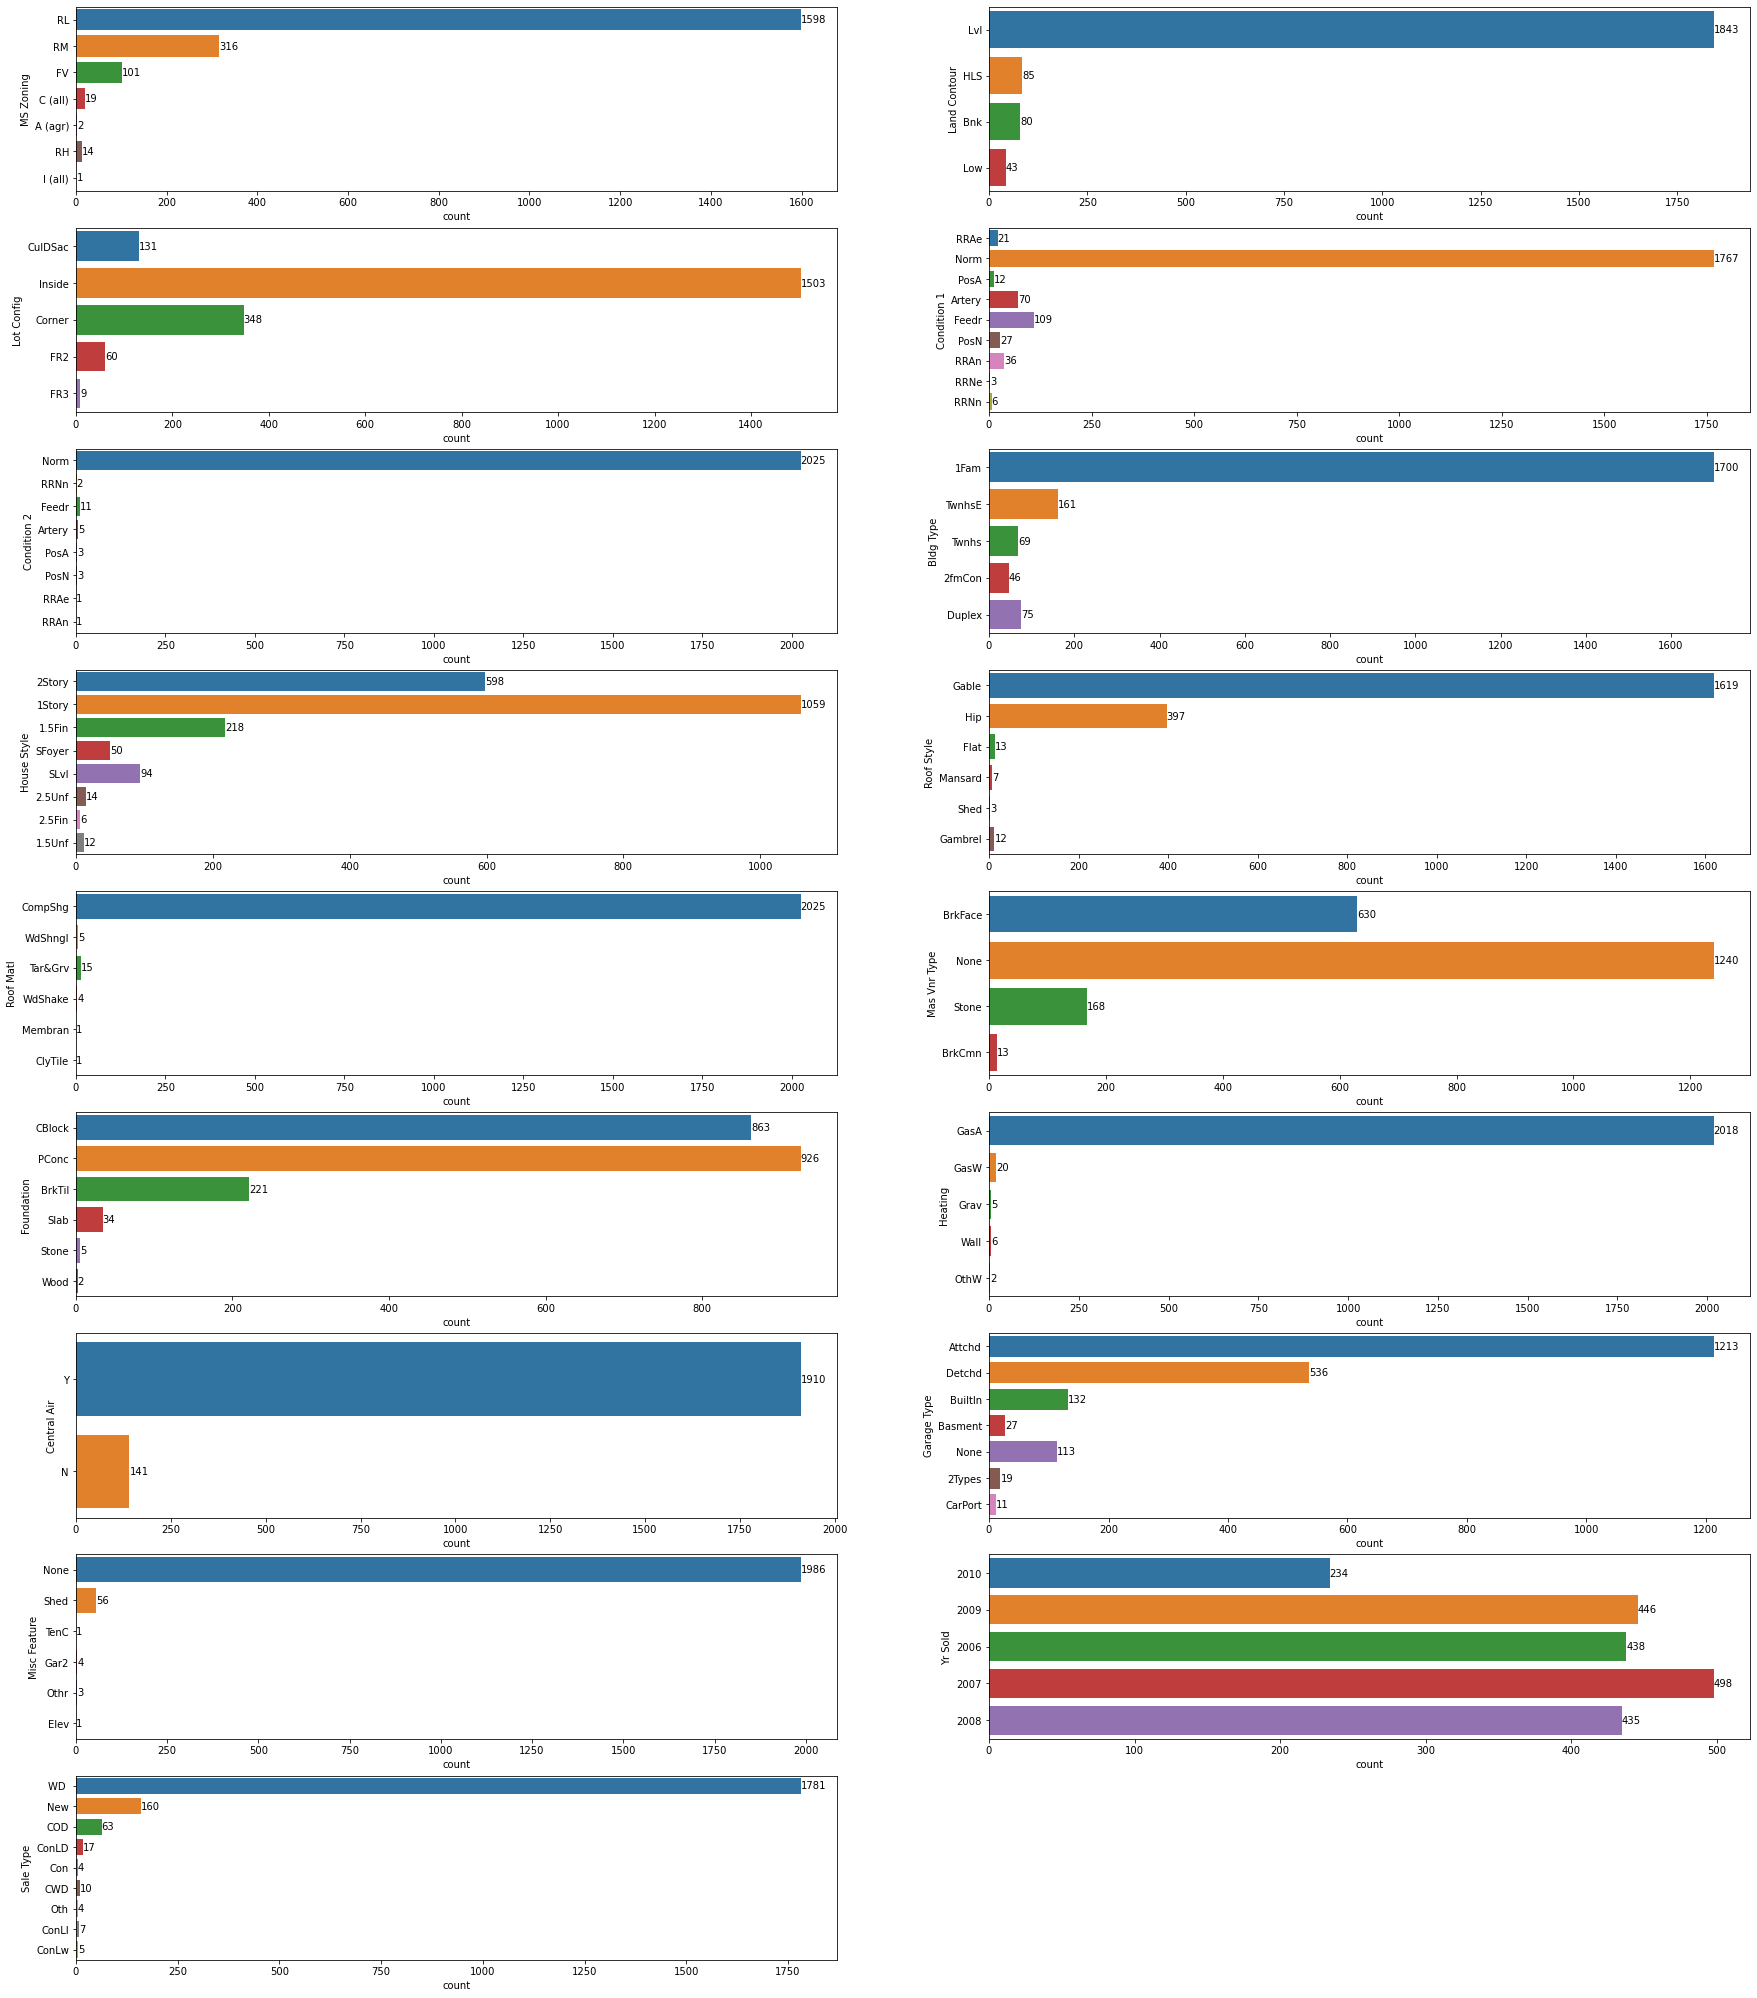

In [54]:
# Those with less than 10 uniques values
cat_less_than_10_uniques()

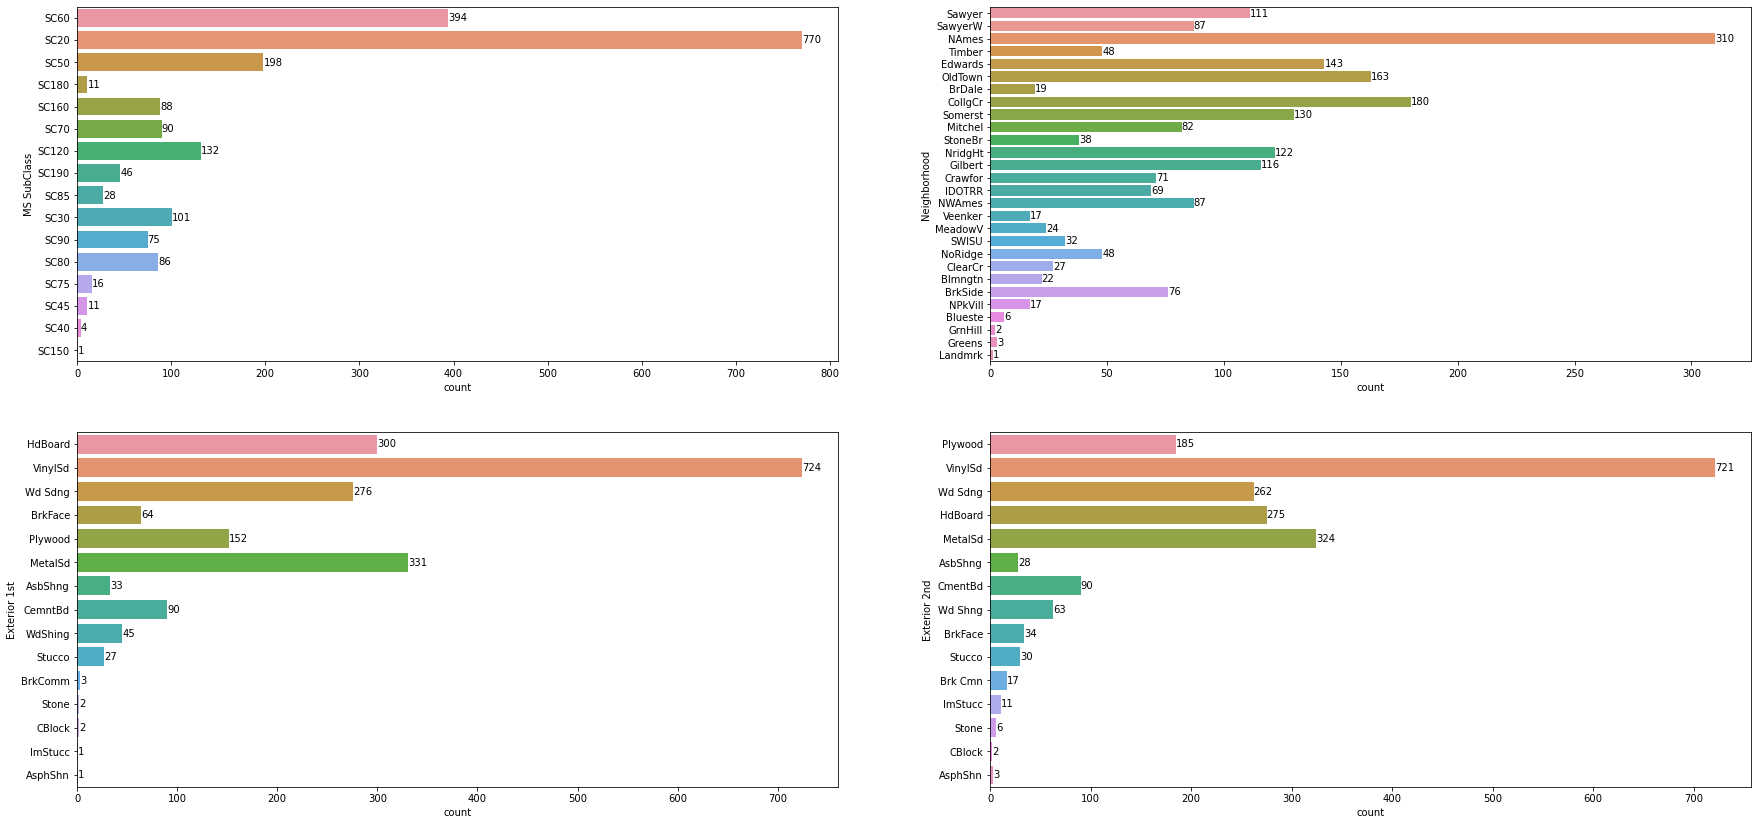

In [55]:
# Those with at least 10 uniques values
cat_at_least_10_uniques()

### Observation

1. The above graphs is meant to visualise all the nominal features and their respective unique values.
2. Given that all of the values will undergo one-hot encoding, those values with low frequency will create new features with low variance. While there was the thought to remove some of the columns after one-hot encoding, I will again rely on advance regression to remove those unhelpful features.

In [56]:
# One-hot encoding the features
cat_house_train = pd.get_dummies(cat_house_train, drop_first=True)

In [57]:
print(f'Number of Nominal Features After One-Hot Encdoing: {cat_house_train.shape[1]}')

Number of Nominal Features After One-Hot Encdoing: 155


In [58]:
# As the values are 1/0, mean will allow us to see the number of '0's in the data
cat_df = pd.DataFrame({'features':cat_house_train.mean().index, '%_of_0':(cat_house_train.mean()*100).values})
cat_df.sort_values(by = '%_of_0', ascending = False)

,features,%_of_0
86,Roof Matl_CompShg,98.732326
64,Condition 2_Norm,98.732326
139,Misc Feature_None,96.830814
131,Central Air_Y,93.125305
23,Land Contour_Lvl,89.858606
154,Sale Type_WD,86.835690
56,Condition 1_Norm,86.153096
81,Roof Style_Gable,78.937104
19,MS Zoning_RL,77.913213
27,Lot Config_Inside,73.281326


### Observation

1. We shall now check for multi-colineatity between nominal features.
2. Due to the high number of features (155 features), we will not be showing a heat map. We will be viewing the correlation between the features.
3. Like the numerical features, the threhold of above 0.7 and below -0.7 is deliberately chosen to pick out the features only with the strongest correlation. The inclination is to preserve as many features before modeling as regression models like lasso and ridge are able to minimise the impact of unhelpful features.
4. The decision process to drop features is keep those features with higher variance when deciding between the features with strong correlation.

In [59]:
cat_house_train_corr = cat_house_train.corr()

In [60]:
arr = cat_house_train_corr.values
index_names = cat_house_train_corr.index
col_names = cat_house_train_corr.columns

R,C = np.where(np.triu(arr,1)>=0.7)

out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=[['row_name','col_name','value']])

df_out

,row_name,col_name,value
0,MS SubClass_SC190,Bldg Type_2fmCon,0.977762
1,MS SubClass_SC20,House Style_1Story,0.746346
2,MS SubClass_SC45,House Style_1.5Unf,0.869663
3,MS SubClass_SC60,House Style_2Story,0.757374
4,MS SubClass_SC75,House Style_2.5Unf,0.733032
5,MS SubClass_SC80,House Style_SLvl,0.954552
6,MS SubClass_SC85,House Style_SFoyer,0.744251
7,MS SubClass_SC90,Bldg Type_Duplex,1.0
8,MS Zoning_FV,Neighborhood_Somerst,0.874854
9,Neighborhood_NPkVill,Exterior 2nd_Brk Cmn,0.822054


In [61]:
cat_house_train.drop(columns=['MS SubClass_SC190',
                              'MS SubClass_SC20',
                              'MS SubClass_SC45',
                              'MS SubClass_SC60',
                              'MS SubClass_SC75',
                              'MS SubClass_SC80',
                              'MS SubClass_SC85',
                              'MS SubClass_SC90',
                              'MS Zoning_FV',
                              'Neighborhood_NPkVill',
                              'Exterior 1st_CemntBd',
                              'Exterior 1st_HdBoard',
                              'Exterior 1st_MetalSd',
                              'Exterior 1st_Plywood',
                              'Exterior 1st_VinylSd',
                              'Exterior 1st_Wd Sdng'],inplace=True)

In [62]:
arr = cat_house_train_corr.values
index_names = cat_house_train_corr.index
col_names = cat_house_train_corr.columns

R,C = np.where(np.triu(arr,1)<= -0.7)

out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=[['row_name','col_name','value']])

df_out

,row_name,col_name,value
0,MS Zoning_RL,MS Zoning_RM,-0.801555
1,Roof Style_Gable,Roof Style_Hip,-0.948438
2,Roof Matl_CompShg,Roof Matl_Tar&Grv,-0.7575
3,Mas Vnr Type_BrkFace,Mas Vnr Type_None,-0.823329
4,Foundation_CBlock,Foundation_PConc,-0.773262
5,Garage Type_Attchd,Garage Type_Detchd,-0.715623
6,Misc Feature_None,Misc Feature_Shed,-0.926095
7,Sale Type_New,Sale Type_WD,-0.747075


In [63]:
cat_house_train.drop(columns=['MS Zoning_RL',
                              'Roof Style_Gable',
                              'Mas Vnr Type_BrkFace',
                              'Foundation_CBlock',
                              'Garage Type_Attchd',
                              'Misc Feature_None',
                              'Roof Matl_CompShg',
                              'Sale Type_New'],inplace=True)

In [64]:
print(f'Number of Nominal Features After 6.3: {cat_house_train.shape[1]}')

Number of Nominal Features After 6.3: 131


### 6.4 Combine the numerical and nominal features

In [65]:
# Once again, let's recap on the numeric features
num_house_train_without_y.head()

,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Fence,Age,BsmtFin Area,Floors SF,Size of Porch,Bsmt Bath
0,0.0,13517,2,0,3,3,6,8,289.0,3,3,0,6,192.0,725.0,5,5,3,1,4,8,0,2,475.0,3,2,0,0,34,533.0,1479,44,0.0
1,43.0,11492,2,0,3,3,7,5,132.0,4,3,0,6,276.0,913.0,5,5,4,1,4,8,3,2,559.0,3,2,0,0,13,637.0,2122,74,1.0
2,68.0,7922,2,0,4,3,5,7,0.0,3,3,0,6,326.0,1057.0,3,5,3,1,4,8,0,1,246.0,3,2,0,0,57,731.0,1057,52,1.0
3,73.0,9802,2,0,4,3,5,5,0.0,4,3,0,1,384.0,384.0,4,5,3,1,3,8,0,3,400.0,3,2,100,0,4,0.0,1444,0,0.0
4,82.0,14235,2,0,3,3,6,8,0.0,2,4,0,1,676.0,676.0,3,5,3,1,3,8,0,1,484.0,3,0,0,0,110,0.0,1445,59,0.0


In [66]:
num_house_train_without_y.shape

(2051, 33)

In [67]:
# Once again, let's recap on the nominal features
cat_house_train.head()

,MS SubClass_SC150,MS SubClass_SC160,MS SubClass_SC180,MS SubClass_SC30,MS SubClass_SC40,MS SubClass_SC50,MS SubClass_SC70,MS Zoning_C (all),MS Zoning_I (all),MS Zoning_RH,MS Zoning_RM,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_ImStucc,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_Oth,Sale Type_WD
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [68]:
cat_house_train.shape

(2051, 131)

In [69]:
# Combining them together
house_train_combined = pd.concat([num_house_train_without_y, cat_house_train], axis=1)

In [70]:
house_train_combined.head()

,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Fence,Age,BsmtFin Area,Floors SF,Size of Porch,Bsmt Bath,MS SubClass_SC150,MS SubClass_SC160,MS SubClass_SC180,MS SubClass_SC30,MS SubClass_SC40,MS SubClass_SC50,MS SubClass_SC70,MS Zoning_C (all),MS Zoning_I (all),MS Zoning_RH,MS Zoning_RM,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_ImStucc,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_Oth,Sale Type_WD
0,0.0,13517,2,0,3,3,6,8,289.0,3,3,0,6,192.0,725.0,5,5,3,1,4,8,0,2,475.0,3,2,0,0,34,533.0,1479,44,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,43.0,11492,2,0,3,3,7,5,132.0,4,3,0,6,276.0,913.0,5,5,4,1,4,8,3,2,559.0,3,2,0,0,13,637.0,2122,74,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,68.0,7922,2,0,4,3,5,7,0.0,3,3,0,6,326.0,1057.0,3,5,3,1,4,8,0,1,246.0,3,2,0,0,57,731.0,1057,52,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,73.0,9802,2,0,4,3,5,5,0.0,4,3,0,1,384.0,384.0,4,5,3,1,3,8,0,3,400.0,3,2,100,0,4,0.0,1444,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [71]:
# Checking the number of features after combining
print(f'Number of Combined Features after Notebook 1: {house_train_combined.shape[1]}')

Number of Combined Features after Notebook 1: 164


In [72]:
# Export dataset out for further analysis
house_train_combined.to_csv("datasets/house_test_combined.csv", index = False)